In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myio import *
from simulation import *

In [2]:
spec_names=('gap', 'shifted_gap','shifted_gap_2', 'log10_gap', 'log10_shifted_gap', 'log10_shifted_gap_2', 'ratio')
time_set= np.power(2, np.arange(40))
lenarr=len(time_set)

In [3]:
# for L in [5]:
#     for lambd in np.linspace(0,1,11):
#         dim_loc=4
#         n_dis=100
#         simdict={'dim_loc': dim_loc, 'L': L, 'n_dis': n_dis}
#         phi=np.pi/3
#         eps=0.1
#         time_set= np.power(2, np.arange(40))
#         idata={'JZZ': 1.0, 'hZ': 1.0, 'hX': 1.0, 'alphas': np.array([(1-lambd)*np.exp(1j*phi)/2, 1, (1-lambd)*np.exp(-1j*phi)/2]),\
#                'betas': np.array([eps,lambd, eps]), 'lambdas': np.array([eps,1,eps]),\
#                'phi': phi, 'lambd': lambd}
#         filename='clock4/clock4_%d_%.2f.txt' %(L,lambd)

#         clockH, clockK, clockZ = clock(dim_loc, L)
#         Z_mean, Z_var, Y_mean, Y_var, spectral_data, spectral_data_var = simulation(dim_loc, L, n_dis, idata, clockH, clockK, clockZ, time_set)

#         with open(filename, 'wb') as f:
#                 for key, value in simdict.items():
#                     f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
#                 for key, value in idata.items():
#                     f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
#                 for i in range(7):
#                     f.write(('\n# '+spec_names[i]+' '+str(spectral_data[i])+' '+str(spectral_data_var[i])).encode('utf-8'))
#                 f.write('\n# time\tRe(Z)\Im(Z)\tVar(Re(Z))\tVar(Im(Z))\n'.encode('utf-8'))
#                 np.savetxt(f, np.stack((time_set, np.real(Z_mean), np.imag(Z_mean),\
#                             np.real(Z_var), np.imag(Z_var), np.real(Y_mean), np.imag(Y_mean),\
#                                         np.real(Y_var), np.imag(Y_var)), axis=-1))

In [4]:
mydt=dt(lenarr)
dataset=np.empty((5,11), dtype=mydt)
for L in range(2,7):
    for i, x in enumerate(np.linspace(0,1,11)):
        d=get_data('clock4/clock4_%d_%.2f.txt' %(L, x), mydt)
        dataset[L-2][i]=d

/home/federica/Documenti/gitrep/exactdiag/2018/myio.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  d['ReY'], d['ImY'], d['ReVarY'], d['ImVarY']=np.genfromtxt(file, unpack=True, dtype=np.complex128)


<IPython.core.display.Javascript object>


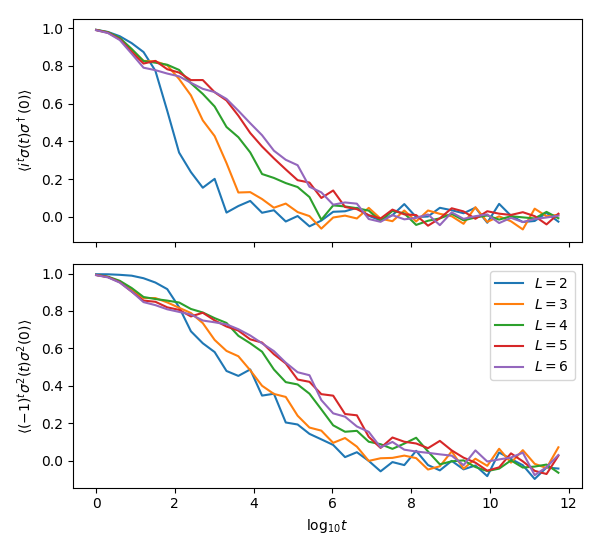

In [5]:
%matplotlib notebook
from ipywidgets import *
x=0.0
i=int(x*10)

f, ax = plt.subplots(2,1,figsize=(6,5.5), sharex=True)
for j, sim in enumerate(dataset[:,i]):
    ax[0].plot(np.log10(sim['time_set']), sim['ReZ'],label= r'$L=$%d' % sim['L'])
    ax[1].plot(np.log10(sim['time_set']), sim['ReY'],label= r'$L=$%d' % sim['L'])
ax[1].set_xlabel(r'$\log_{10} t$')
ax[0].set_ylabel(r'$\langle i^t\sigma (t)\sigma^\dagger(0)\rangle$')
ax[1].set_ylabel(r'$\langle (-1)^t\sigma^2 (t)\sigma^2(0)\rangle$')
plt.legend()
plt.tight_layout()
plt.show()

def update(x = (0,1,0.1)):
    i=int(x*10)
    for j, line in enumerate(ax[0].lines):
            line.set_ydata(dataset[j,i]['ReZ'])
    for j, line in enumerate(ax[1].lines):
            line.set_ydata(dataset[j,i]['ReY'])
    f.canvas.draw()

In [6]:
interact(update);

<IPython.core.display.Javascript object>


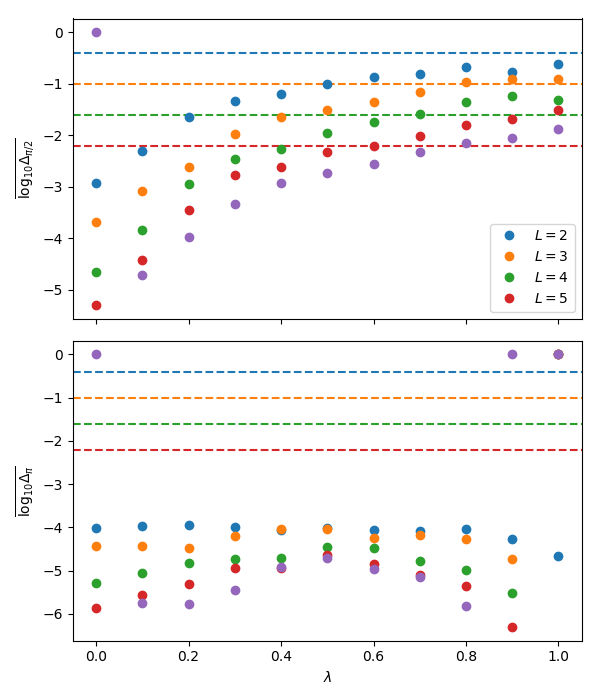

In [10]:
%matplotlib notebook
import matplotlib.lines as mlines
f2, ax2 = plt.subplots(2,1,figsize=(6,7), sharex=True)


handles=[]

for L in range(2,6):
    ax2[0].axhline(y=np.log10(2*np.pi/4**L), linestyle='dashed', color='C%d' %(L-2))
    ax2[1].axhline(y=np.log10(2*np.pi/4**L), linestyle='dashed', color='C%d' %(L-2))
    handles.append(mlines.Line2D([], [], color='C%d' %(L-2), linestyle='', marker='o', label=r'$L=$%d' % L))
for sim in np.nditer(dataset):
    ax2[0].plot(sim['lambd'], sim['log10_shifted_gap'][0],marker='o',label= r'$L=$%d' % sim['L'], color='C%d' %(sim['L']-2))
    ax2[1].plot(sim['lambd'], sim['log10_shifted_gap_2'][0], marker='o',label= r'$L=$%d' % sim['L'], color='C%d' %(sim['L']-2))
ax2[0].legend(handles=handles)

ax2[1].set_xlabel(r'$\lambda$')
ax2[0].set_ylabel(r'$\overline{\log_{10} \Delta_{\pi/2}}$')
ax2[1].set_ylabel(r'$\overline{\log_{10} \Delta_{\pi}}$')
plt.tight_layout()

plt.show()

In [25]:
for L in [5]:
    dim_loc=4
    n_dis=100
    simdict={'dim_loc': dim_loc, 'L': L, 'n_dis': n_dis}
    phi=np.pi/3
    eps=0.1
    idata=[]
    filename='clock4IPR/clock4_%d.txt' %L
    lvec=np.linspace(0,1,11)
    for i,lambd in enumerate(lvec):
        idata.append({'JZZ': 1.0, 'hZ': 1.0, 'hX': 1.0,\
                      'alphas': np.array([(1-lambd)*np.exp(1j*phi)/2, 1, (1-lambd)*np.exp(-1j*phi)/2]),\
               'betas': np.array([eps,lambd, eps]), 'lambdas': np.array([eps,1,eps]),\
               'phi': phi, 'lambd': lambd})
        

    clockH, clockK, clockZ = clock(dim_loc, L)
    IPR_step, IPR_tot = IPR(dim_loc, L, n_dis, idata, clockH, clockK)

    with open(filename, 'wb') as f:
            for key, value in simdict.items():
                f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
            for key, value in idata[0].items():
                f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
            f.write('\n# lambda\tIPR step\tIPR tot\n'.encode('utf-8'))
            np.savetxt(f, np.stack((lvec, np.array(IPR_step), np.array(IPR_tot)), axis=-1))

KeyboardInterrupt: 

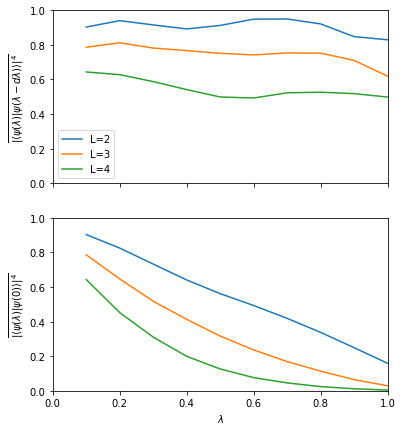

In [24]:
%matplotlib inline

fig, axes = plt.subplots(2,1,figsize=(6,7), sharex=True)
for L in [2,3,4]:
    l, IPRstep, IPRtot =np.loadtxt('clock4IPR/clock4_%d.txt' %L, unpack=True)
    axes[0].plot(l[1:],IPRstep[1:], label='L=%d' %L)
    axes[1].plot(l[1:],IPRtot[1:])
axes[0].legend()
axes[1].set_xlabel(r'$\lambda$')
axes[0].set_ylabel(r'$\overline{|\langle \psi(\lambda)|\psi(\lambda-d\lambda)\rangle|^4}$')
axes[1].set_ylabel(r'$\overline{|\langle \psi(\lambda)|\psi(0)\rangle|^4}$')
for ax in axes:
    ax.set_ylim((0,1))
    ax.set_xlim((0,1))
plt.show()
#plt.savefig('overlap.eps')